## Adult Income Case Study

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
temp = pd.read_csv('https://raw.githubusercontent.com/MahbubHossainFaisal/Data-Science/master/Pandas/Datasets/adult.csv')

df = temp.copy()

df.head(5)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [72]:
df.shape

(48842, 15)

### Fetch Random Sample From the Dataset (50%)

In [73]:
df.sample(frac=.50)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
37125,50,Private,108446,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
30114,27,Private,189974,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
18807,41,Local-gov,90692,HS-grad,9,Divorced,Prof-specialty,Unmarried,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K
24497,51,Private,202956,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
1223,50,Private,309017,Some-college,10,Divorced,Sales,Unmarried,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,43,Private,203554,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K
25691,19,Private,418176,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,32,United-States,<=50K
4458,32,Private,377017,Bachelors,13,Never-married,Sales,Other-relative,White,Male,0,0,32,United-States,<=50K
48025,46,Private,186410,Prof-school,15,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,>50K


In [74]:
## Random seed example

import pandas as pd

# Create a DataFrame
data = {'Name': ['John', 'Alice', 'Bob', 'Emily', 'Tom'],
        'Age': [25, 30, 35, 40, 45],
        'City': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']}
df = pd.DataFrame(data)

# Set a random seed
random_seed = 42

# Randomly sample 3 rows from the DataFrame using the seed
sample = df.sample(n=3, random_state=random_seed)

print(sample)


    Name  Age    City
1  Alice   30  London
4    Tom   45  Sydney
2    Bob   35   Paris


By setting random_state=random_seed, the random sample will be the same every time you run the code with random_seed set to 42. If you change the seed value, you will get a different random sample.

### Example of weights

Weights:
Weights allow you to assign probabilities or sampling proportions to each element in a dataset. When performing random sampling with weights, elements with higher weights are more likely to be selected compared to elements with lower weights.

In [75]:
import pandas as pd

# Create a DataFrame
data = {'Name': ['John', 'Alice', 'Bob', 'Emily', 'Tom'],
        'Age': [25, 30, 35, 40, 45],
        'City': ['New York', 'London', 'Paris', 'Tokyo', 'Sydney']}
df = pd.DataFrame(data)

# Assign weights to each row
weights = [0.1, 0.2, 0.3, 0.2, 0.2]

# Randomly sample 2 rows from the DataFrame with weights
sample = df.sample(n=2, weights=weights)

print(sample)


    Name  Age    City
3  Emily   40   Tokyo
1  Alice   30  London


In this case, each row in the DataFrame has a corresponding weight in the weights list. The higher the weight assigned to a row, the more likely it is to be included in the random sample. The probability of selecting a row is proportional to its weight relative to the sum of all weights. So, in the example, the row with a weight of 0.3 has a higher chance of being selected compared to the other rows.

### Check Null Values In The Dataset

In [76]:
df = temp.copy()
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<AxesSubplot: >

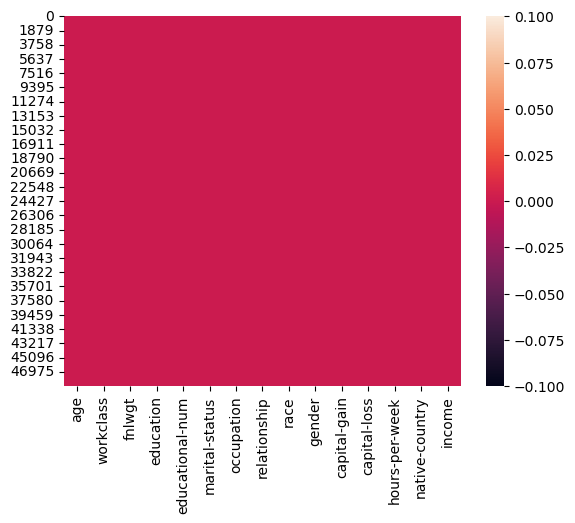

In [77]:
sns.heatmap(df.isnull())

### Perform Data Cleaning [ Replace '?' with NaN ]

In [78]:
# finding rows that has ? in the column values
df[df.isin(['?']).any(axis=1)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [79]:
# Replacing ? to NAN

what_rows = df[df.isin(['?']).any(axis=1)]

df.loc[what_rows.index] = df.loc[what_rows.index].replace('?',np.nan)


<AxesSubplot: >

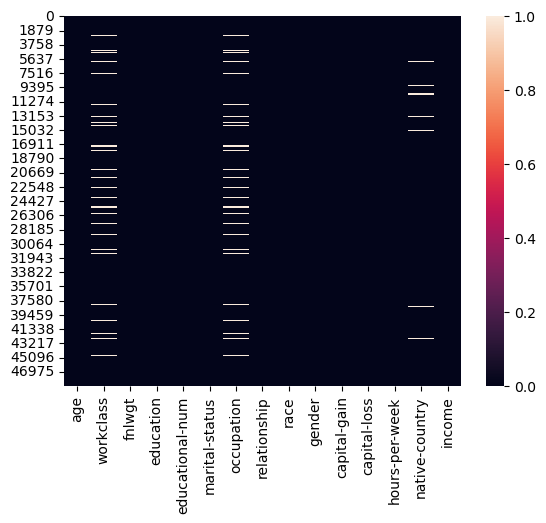

In [80]:
# verifying
sns.heatmap(df.isnull())

We can see that NaN values are showing in the graph

### Drop all The Missing Values

In [81]:
per_col_missing_data_percentage = df.isnull().sum()*100/len(df)
per_col_missing_data_percentage

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [82]:
#dropping null values
df.dropna(how='any',inplace = True)

In [83]:
#verifying
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Check For Duplicate Data and Drop Them

In [84]:
# checking for duplicate data

df[df.duplicated()]


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [ ]:
df.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [70]:
df.shape

(45222, 15)